## 這份code只是測試用 (pendigits dataset)，所以寫很醜

In [1]:
import os
import pickle
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt 
from utils import *
from STSC.stsc import *

In [2]:
dataset_name = './dataset/pendigits.mat'
#dataset_name = 'airquality'
data, outliers_index, inliers_index = read_dataset(dataset_name)
dataset_name = 'pendigits'
X, SQ, fp_record = generate_X_SQ(data, outliers_index) # fp_record會回傳數字對應到的feature pair 
G = generate_graph(X)
V = get_V(G)
if not os.path.isfile('outlier_weight_{}.npy'.format(dataset_name)):
    S = maximum_weight_matching(SQ, V)
    np.save("./weights/outlier_weight_{}".format(dataset_name), S)
else:
    S = np.load("./weights/outlier_weight_{}.npy".format(dataset_name))
n_cluster = 8
C = self_tuning_spectral_clustering_np(S, max_n_cluster=15)
#C = self_tuning_spectral_clustering_np(S, n_cluster, n_cluster)
#C = self_tuning_spectral_clustering_np(S) # for iris 
    
with open('./weights/{}_cluster_{}.pickle'.format(n_cluster, dataset_name), 'wb') as f:
    pickle.dump(C, f)
print('number of cluster: ', len(C))
    
W = cvx_solver(C, X, X.shape[1], 10)
print(W.shape)

Computing transition probabilities:   0%|          | 0/120 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  8.92it/s]


hey (120, 128)
n_cluster: 2 	 cost: 1855.814983
n_cluster: 3 	 cost: 190.554467
n_cluster: 4 	 cost: 200.420924
n_cluster: 5 	 cost: 235.430172
n_cluster: 6 	 cost: 216.110993
n_cluster: 7 	 cost: 217.527241
n_cluster: 8 	 cost: 219.291174
n_cluster: 9 	 cost: 234.928191
n_cluster: 10 	 cost: 258.303895
n_cluster: 11 	 cost: 287.655408
n_cluster: 12 	 cost: 308.617424
n_cluster: 13 	 cost: 280.101231
n_cluster: 14 	 cost: 284.842414
n_cluster: 15 	 cost: 294.435733
number of cluster:  3
(120, 3)


In [3]:
print(C[0])
print(C[1])
print(C[2])

[4, 6, 7, 8, 16, 18, 25, 26, 31, 35, 45, 48, 49, 54, 58, 61, 62, 64, 66, 67, 69, 76, 80, 88, 89, 90, 92, 97, 101, 102, 114, 116, 117, 125, 129, 130, 131, 132, 136, 137, 140, 143, 144, 146, 147, 155]
[0, 1, 2, 5, 11, 12, 13, 14, 21, 22, 23, 32, 33, 36, 37, 38, 39, 41, 44, 46, 47, 50, 52, 53, 60, 63, 68, 71, 73, 74, 75, 77, 78, 79, 82, 87, 91, 93, 95, 104, 107, 109, 112, 113, 118, 121, 122, 123, 128, 133, 148, 150, 151, 152, 153, 154]
[3, 9, 10, 15, 17, 19, 20, 24, 27, 28, 29, 30, 34, 40, 42, 43, 51, 55, 56, 57, 59, 65, 70, 72, 81, 83, 84, 85, 86, 94, 96, 98, 99, 100, 103, 105, 106, 108, 110, 111, 115, 119, 120, 124, 126, 127, 134, 135, 138, 139, 141, 142, 145, 149]


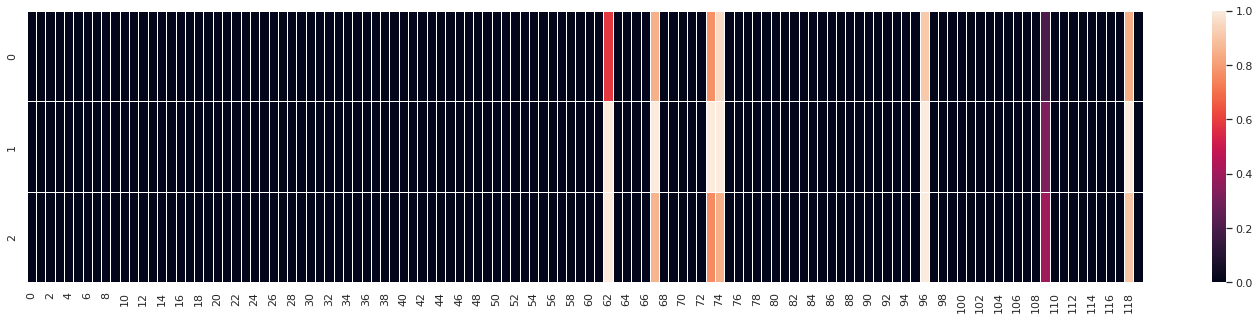

In [4]:
plt.figure(figsize = (25,5))
ans = W.T
ax = sns.heatmap(ans[:, :],linewidths=0.5, linecolor='white')

## 找出weight前三高的feature pair

In [5]:
for i in range(ans.shape[0]):
    print("cluster ",i+1)
    #max_index = np.argmax(ans[i])
    temp = np.argsort(ans[i])[-3:] # 取weight前3高的fp
    for j in temp:
        print(j, 'weight:', ans[i][j], ' attr_'+str(fp_record[j][0]), 'attr_'+str(fp_record[j][1]))
    print("")
    #print(max_index, fp_record[max_index], len(C[i]))

cluster  1
67 weight: 0.8490542584151117  attr_5 attr_8
96 weight: 0.9120155314909664  attr_8 attr_13
74 weight: 0.9551836261381033  attr_5 attr_15

cluster  2
67 weight: 1.0000000000000862  attr_5 attr_8
74 weight: 1.0000000000001135  attr_5 attr_15
96 weight: 1.0000000000001887  attr_8 attr_13

cluster  3
118 weight: 0.8951315076688972  attr_13 attr_15
96 weight: 1.000000000000062  attr_8 attr_13
62 weight: 1.0000000000000682  attr_4 attr_13



In [6]:
df_1 = create_df(data[outliers_index], data[inliers_index], C[0]) # for cluster 0 
df_2 = create_df(data[outliers_index], data[inliers_index], C[1]) # for cluster 1
df_3 = create_df(data[outliers_index], data[inliers_index], C[2]) # for cluster 2 

### Cluster 1 (attr_5, attr_15)

Text(0.5, 1.0, 'Cluster 1')

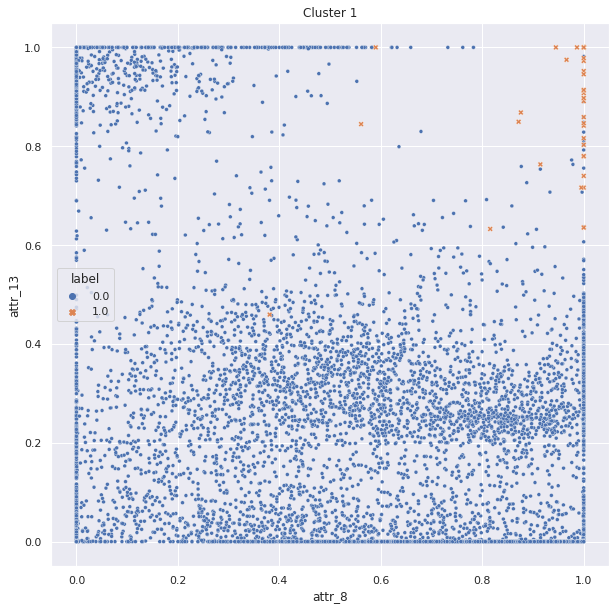

In [7]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(data=df_1, x='attr_8', y='attr_13', hue='label', style='label',s=df_1['label']*15+15)
ax.set_title("Cluster 1")

### Cluster 2 (attr_8, attr_13)

Text(0.5, 1.0, 'Cluster 2')

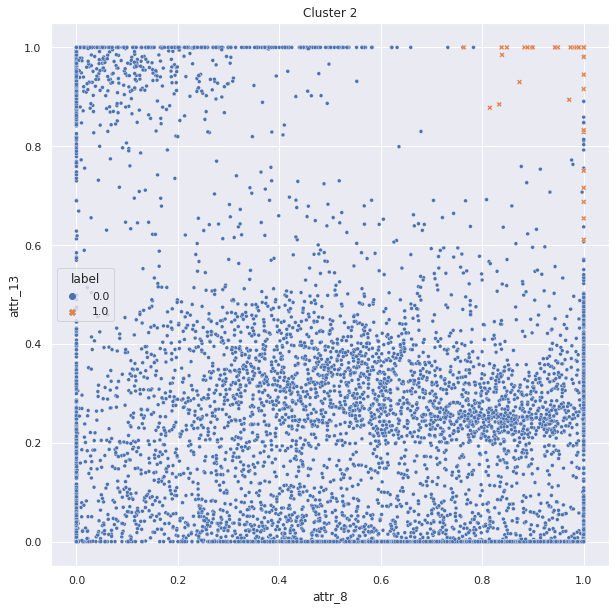

In [12]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(data=df_2, x='attr_8', y='attr_13', hue='label', style='label',s=df_2['label']*15+15)
ax.set_title("Cluster 2")

### Cluster 3 (attr_4, attr_13)

Text(0.5, 1.0, 'Cluster 3')

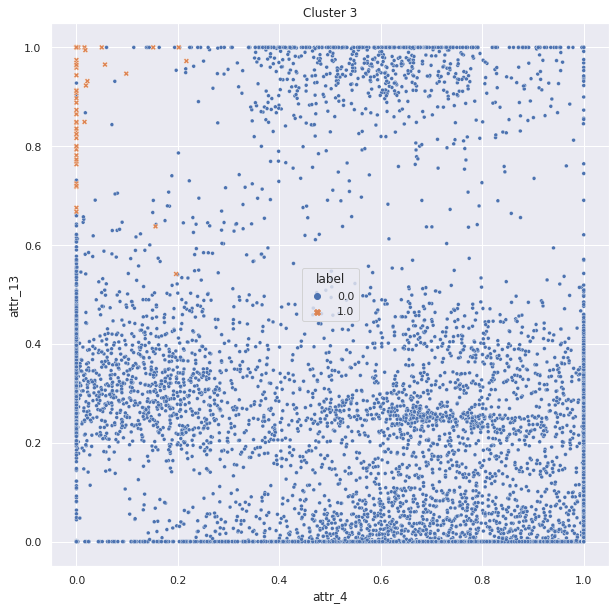

In [11]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(data=df_3, x='attr_4', y='attr_13', hue='label', style='label',s=df_3['label']*15+15)
ax.set_title("Cluster 3")